<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

**1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.**

*En un puntaje/SCORE de 0 a 10, donde 10 representa más libertad. El valor surge de un calculo en base a diferentes estimadores. En la tabla algunos SCORE son promedios de otro Score; y Rank es el ranking relativo a los otros paises.*

*Nota: buscar el puntaje de la region mediante un clasificador de regiones?. Cuantas regiones tenemos?*.


**2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?**

*hf_promedio mundial (162 países) 2017 = 6.89. 

Vs 2016, el nivel de libertad disminuyó ligeramente (−0.01), con 70 países aumentando sus calificaciones y 88 disminuyendo. 

vs since 2008, el nivel de libertad global también ha disminuido ligeramente (−0.07), con 61 países en el índice aumentando sus calificaciones y 79 disminuyendo.*


*Nota: Grafico de lineas entre pais de la region latinoamericana. Otro graf entre prom regiones.*.

**3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?** Respuesta: NO!
*Tal como se demuestra mas abajo en la notebook, cuando hace la depuracion de columnas se ve que identity solo aparece como subcategoria de pf. Incluso, pf_identity tiene subcategorias:

-pf_identity_ legal: posibilidad de cambio de genero. 

-pf_identity_sex (sub sub categoria, pf_identity_sex_female, pf_identity_sex_male). Posibilidad de matrimonio con el mismo sexo.

-pf_identity_divorce* Posibilidad del derecho al divorcio entre mujeres y hombres. 

*Extraido textual del pdf:*
E. Identity and Relationships*

*i. Legal Gender*: A rating of 10 was assigned to countries with no requirements for sex/gender marker change. A rating of 7 was assigned to countries with prohibitive medical requirements, including hormonal treatment, sterilization, and genital surgery. A rating of 0 was assigned to countries without a possibility for sex/gender marker change. 

*ii. Same-Sex Relationships*
        a. Male-to-Male Relationships
        b. Female-to-Female Relationships
A rating of 10 was assigned to countries where maleto-male/f to F relationships are legal. A rating of 5 was assigned to countries where maleto-male/f to F relationships are legal only in some areas of the country. A rating of 0 was assigned to countries where maleto-male/f to F relationships are illegal. 
        
*iii. Divorce*: A rating of 10 was assigned to countries where women have both the same rights to initiate divorce and the same requirements to finalize
divorce or annulment as men, without negative repercussions on their parental authority. A rating of 7.5 was assigned to countries where women of all groups have both the same rights to initiate divorce and the same requirements to finalize divorce or annulment as men, without negative repercussions on their parental authority, but where some customary, religious, or traditional laws or practices discriminate against womenʼs rights regarding divorce and/or parental authority after divorce. A rating of 5 was assigned to countries where women have both the same rights to initiate divorce and the same requirements to finalize divorce or annulment as men, without negative repercussions on their parental authority, but where this right does not apply to all groups of women. 
A rating of 2.5 was assigned to countries where women do not have the same rights over divorce as men: either their rights to initiate divorce and/or the requirements to finalize divorce or annulment are unequal, or their parental authority after divorce is restricted. A rating of 0 was assigned to countries where women do not have the same rights over divorce as men: both their rights to initiate divorce and/or the requirements to finalize divorce or annulment are unequal and their parental authority after divorce is restricted.
 
*#Video 02.8: Nos debemos preguntar, ¿vamos a analizar pais por pais? año por año? intervalos de años?*

Inicialmente, en toda **exploración de datos** tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.10.1'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv('https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!
#print(len(dataset.columns))

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

In [5]:
dataset[:5]

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [7]:
dataset[important_cols] 

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,-,10,10,10,10,10,9.29,7,8.18,6,8.73,4
1616,2008,DNK,Denmark,Western Europe,-,10,10,10,10,10,9.49,3,7.98,9,8.73,4
1617,2008,CHE,Switzerland,Western Europe,-,10,10,10,10,10,9.31,6,8.35,4,8.83,3
1618,2008,NZL,New Zealand,Oceania,-,10,10,10,10,10,9.42,4,8.46,3,8.94,2


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [8]:
dataset.dtypes

year                                  int64
ISO_code                             object
countries                            object
region                               object
hf_score                             object
                                      ...  
ef_regulation_business_compliance    object
ef_regulation_business               object
ef_regulation                        object
ef_score                             object
ef_rank                              object
Length: 120, dtype: object

In [9]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:  #redundante?
    dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
  3. ¿Tiene sentido calcular la moda?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  

**1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.**

In [11]:
def var_rango(dataset):
    dict={}
    for x in range(len(dataset)):
        if x == len(dataset.columns):
            break
        col=(dataset.columns[x])
        max_v=dataset[col].max()
        if type(max_v) == str:
            continue
        min_v=dataset[col].min()
        rango=max_v-min_v
        #print((len(dataset))
        dict[col]= max_v,min_v,rango
    return pandas.DataFrame(dict, index=["Max","Min","Rango"])

In [66]:
print("El rango de las variables")
var_rango(dataset)

El rango de las variables


,year,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
Max,2017,10.0,10.0,10.0,10.0,10.0,10.0,9.56,162.0,9.11,162.0,9.12,162.0
Min,2008,0.0,0.0,0.0,0.0,0.0,0.0,2.22,1.0,2.58,1.0,3.69,1.0
Rango,9,10.0,10.0,10.0,10.0,10.0,10.0,7.34,161.0,6.53,161.0,5.43,161.0


**2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity y hf_score*. Si queremos comparar un país con otro (1vs1), ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana?**

La manera adecuada de comparar un país con otro (1vs1) podría ser comparar los valores de las variable *pf_identity y hf_score* en un Grafico de lineas en donde se visualice los valores a lo largo del tiempo.
Tambien es válido comparar un único valor de los dos países empleando una Tabla que exhiba el promedio de estos 10 años.
   
    b2.Otra alternativa seria utilizar la mediana o la moda.

**3. Obtener media, mediana y desviación estándar de las variables *pf_identity y hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.**

In [13]:
d_latin=dataset[dataset.region == "Latin America & the Caribbean"]

In [14]:
def mmestd(w_dataset,l_dataset): #mmestd= Media, MEdian & STD
    lst=[]
    dict={}
    co=["pf_identity", "hf_score"]
    for i in range(len(co)):
        w_mean=w_dataset[co[i]].mean() #w_ = world
        w_median=w_dataset[co[i]].median()
        w_std=w_dataset[co[i]].std()
        l_mean=l_dataset[co[i]].mean() #l_=latin
        l_median=l_dataset[co[i]].median()
        l_std=l_dataset[co[i]].std()
        lst= lst + [w_mean,w_median,w_std] + [l_mean,l_median,l_std]
    #print (lst)
    dict={"World_pf_identity": lst[:3], "Latin_pf_identity":lst[3:6],"World_hf_score": lst[6:9], "Latin_hf_score": lst[9:]}
    #print(dict)
    return pandas.DataFrame(dict, index=["Media","Mediana","Desv Estandar"])
    

In [15]:
mmestd(dataset,d_latin)

,World_pf_identity,Latin_pf_identity,World_hf_score,Latin_hf_score
Media,7.280649,8.582171,6.978214,7.036977
Mediana,8.800000,10.000000,6.900000,7.020000
Desv Estandar,3.181577,1.875832,1.056239,0.634897


**Conclusiones:**
Tal como se expuso, la presentación de un único valor es más eficaz en una tabla.
La **media** de latinoamerica esta por encima de la media mundial, para ambas variables.
La **mediana** también es útil, ya que permite independizarse de los valores outliers de los extremos. En este caso vemos que la mediana es 10, por lo que demuestra que existen paises con valores muy bajos de pf_identity que están reduciendo la **media**.
Tal como esperábamos, la **Desv Estandar** de los datos es menor en Latin. 

**4.¿Tiene sentido calcular la moda?**

In [16]:
def vsmode(w_dataset,l_dataset): #calcular la moda
    lst=[]
    dict={}
    co=["pf_identity", "hf_score"]
    for i in range(len(co)):
        w_mode=w_dataset[co[i]].mode()
        l_mode=l_dataset[co[i]].mode()
        lst= lst + [float(w_mode)] + [float(l_mode)]
    #print (lst)
    dict={"World_pf_identity": lst[0], "Latin_pf_identity":lst[1],"World_hf_score": lst[2], "Latin_hf_score": lst[3]}
    #print(dict)
    return pandas.DataFrame(dict, index=["mode"])

In [17]:
vsmode(dataset,d_latin)

,World_pf_identity,Latin_pf_identity,World_hf_score,Latin_hf_score
mode,10.0,10.0,6.75,6.72


**Conclusiones:** Tiene sentido en calcular la moda, ya que nos permite ver que es lo mas frecuente. En este sentido, la moda sugiere que Latin es muy similar al resto del mundo en ambas variables.

**5.¿Cómo pueden sanearse los valores faltantes?**
La estrategia del NaN para los valores faltantes es válida.

**6.¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos?** 

Para saber si hay outliers y eliminarlos se puede usar la función clean_outliers.

Para ayudar a la visualizacion se puede ver la distribucion en Box-plot.

**hf_score**


Previo a la limpieza de outliers 
Score max: 9.12 Score min: 3.69


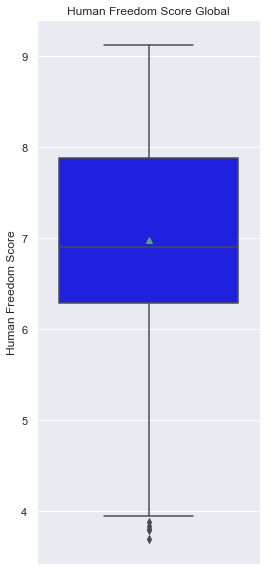

In [123]:
seaborn.set()
hfs_data=dataset.hf_score
plt.figure(figsize=(4,10))
seaborn.boxplot(data=dataset,y='hf_score',showmeans=True, color="Blue")
plt.ylabel('Human Freedom Score')
plt.title('Human Freedom Score Global')
print("Previo a la limpieza de outliers","\nScore max:", hfs_data.max(), "Score min:",hfs_data.min())

*Se observa en la distribución que hay valores en los extremos, particularmente alrededor de 3.69, que podrían ser outliers. Vamos aplicar la función:*

In [98]:
def clean_outliers(interesting_col):
    mask_outlier = (numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [99]:
out_hsf_data=clean_outliers(hfs_data).hf_score
#out_hsf_data.describe()
print("Valores removidos por ser considerados outliers:", len(hfs_data) - len(out_hsf_data))

Valores removidos por ser considerados outliers: 93


**Conclusión:** Valores por debajo de 3.69, fueron eliminados!
¿Quienes son?

In [107]:
def ver_outliers(interesting_col):
    mask_outlier = (numpy.abs(interesting_col - interesting_col.mean()) > (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

In [108]:
hfs_out=ver_outliers(hfs_data)
print(hfs_out.countries, len(hfs_out.countries))

137          Sudan
141          Syria
157      Venezuela
159    Yemen, Rep.
232           Iraq
303          Syria
319      Venezuela
321    Yemen, Rep.
465          Syria
481      Venezuela
483    Yemen, Rep.
627          Syria
789          Syria
Name: countries, dtype: object 13


***pf_identity***

Previo a la limpieza de outliers 
Score max: 10.0 Score min: 0.0


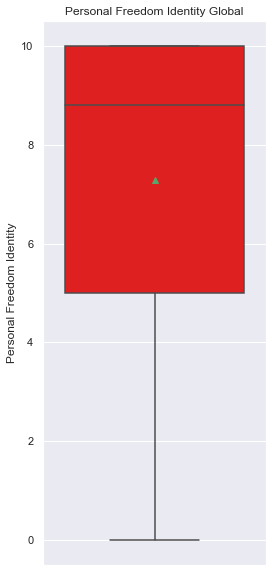

In [121]:
pfi_data=dataset.pf_identity
plt.figure(figsize=(4,10))
seaborn.boxplot(data=dataset,y='pf_identity',showmeans=True, color="Red")
plt.ylabel('Personal Freedom Identity')
plt.title('Personal Freedom Identity Global')
print("Previo a la limpieza de outliers","\nScore max:", pfi_data.max(), "Score min:",pfi_data.min())

**Conclusión:** Los valores min y max abarcan todo el espectro, de 0 a 10. La funcion no podrá eliminar valores.

6. **Los outliers, ¿son globales o por grupo?**

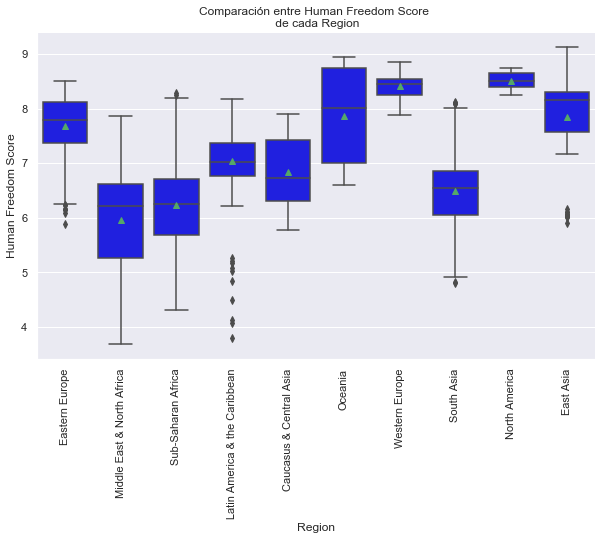

In [122]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,x='region', y='hf_score', color="Blue", showmeans=True) 
plt.ylabel('Human Freedom Score')
plt.xlabel('Region')
plt.title('Comparación entre Human Freedom Score \n de cada Region')
plt.xticks(rotation=90)
seaborn.despine()

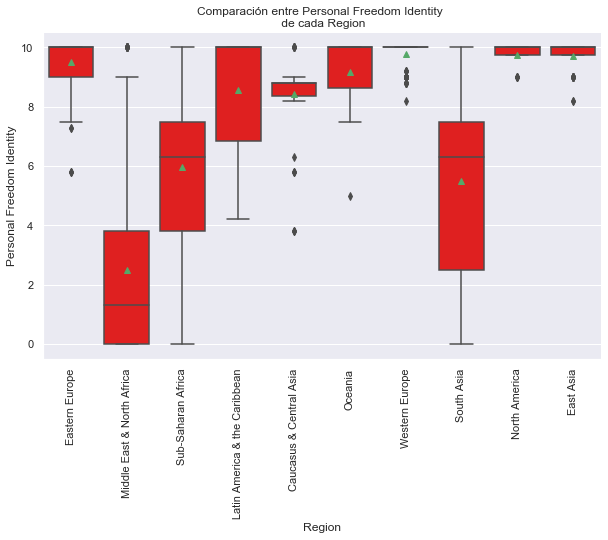

In [119]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,x='region', y='pf_identity', color="red", showmeans=True) 
plt.ylabel('Personal Freedom Identity')
plt.xlabel('Region')
plt.title('Comparación entre Personal Freedom Identity \n de cada Region')
plt.xticks(rotation=90)
seaborn.despine()

**Conclusiones:**
En término de *hf_score*, en el análisis global y por regiones se encuentran outliers diferentes.
En el analisis global, 3.69 era el límite inferior. Mientras que en análsis regional Latin&central presentan outliers con valores por debajo de 6.
Por lo tanto, valores outliers a nivel regional, pueden significar valores permitidos/correctos en el analisis global.

**6. ¿Los eliminaría del conjunto de datos?** Depende de que variables estoy estudiando y siempre reflexioando sobre cuanto me afecta sacar o mantener esos valores tan alejados de la media.

**6. Los outliers, ¿son globales o por grupo?**

En ambos analisis, global y por grupo/regiones, se encuentran outliers diferentes.

a. Existen outliers propios en cada región.

a. Hay una gran diferencia entre regiones, ya que la mayoria tiene una media 9-10, valor maximo que puede adquirir esta variable, mientras que otros tienen valores iguales o menores a seis, generando una gran dispersion en el analisis global. 

6. ¿Los eliminaría del conjunto de datos? Si, pero a nivel región. 

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### 1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.



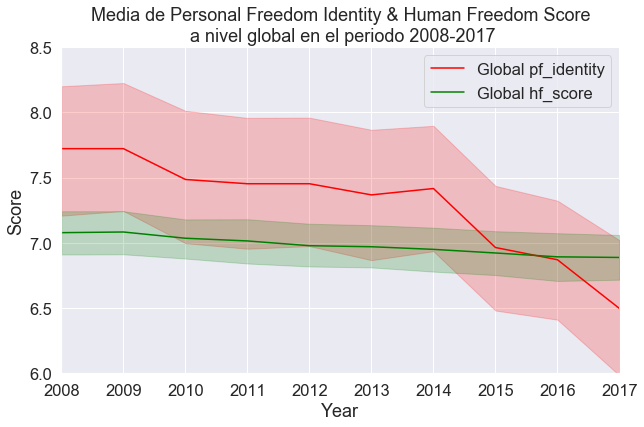

In [137]:
seaborn.set(font_scale=1.5)
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y="pf_identity", color="red", estimator="mean", label="Global pf_identity",)
seaborn.lineplot(data=dataset, x='year', y="hf_score", color="green", estimator="mean", label="Global hf_score")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Media de Personal Freedom Identity & Human Freedom Score\n a nivel global en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(6,8.5)
plt.legend()
seaborn.despine()

## 2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?**

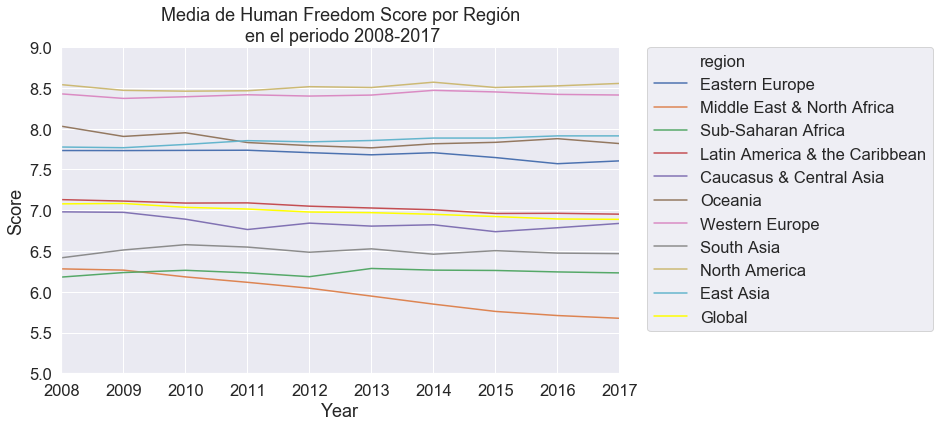

In [138]:
seaborn.set(font_scale=1.5)
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y="hf_score", hue="region", estimator="mean", ci=None)
seaborn.lineplot(data=dataset, x='year', y="hf_score", color="yellow", estimator="mean", ci=None, label="Global")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Media de Human Freedom Score por Región\n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(5,9)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Conclusión:** Salvo "Middle East & North Afirca" quien muestra una marcada disminución de su Score a lo largo de los años, en los demas se ve una tendencia estable tal cual se ve en el "Global".

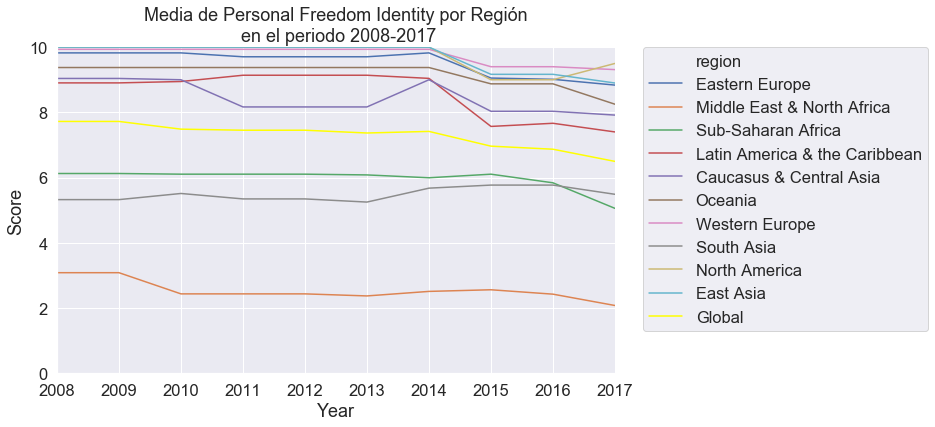

In [139]:
seaborn.set(font_scale=1.5)
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset, x='year', y="pf_identity", hue="region", ci=None)
seaborn.lineplot(data=dataset, x='year', y="pf_identity", color="yellow", estimator="mean", ci=None, label="Global")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Media de Personal Freedom Identity por Región\n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(0,10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Conclusión**: Salvo "South Asia" quien entre 2008 y 2017 mantiene su pf_Identity a lo largo de los años, en las demas regiones se ve una tendencia a disminuir tal cual se ve en el "Global".

## 3.Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable pf_identity en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

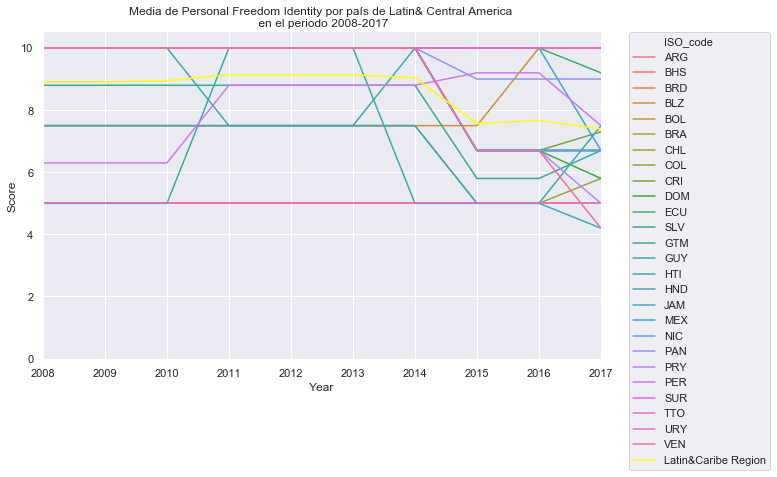

In [171]:
seaborn.set(font_scale=1)
plt.figure(figsize=(10,6))
seaborn.lineplot(data=d_latin, x='year', y="pf_identity", hue="ISO_code", estimator="mean", ci=None)
seaborn.lineplot(data=d_latin, x='year', y="pf_identity", color="yellow", estimator="mean", ci=None, label="Latin&Caribe Region")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Media de Personal Freedom Identity por país de Latin& Central America \n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(0,10.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Conclusión:** Grafique todos. Se puede observar que un grupo de paises sufren una disminucion significativa en 2014.
Esos son los paises que elegiria para graficar, ya que acompañan la tendencia de la region. Se hace seleccion por inspeccion visual.


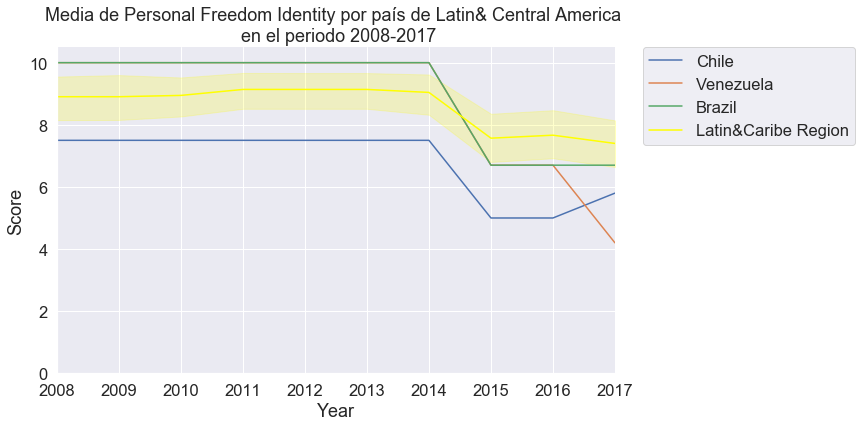

In [178]:
seaborn.set(font_scale=1.5)
plt.figure(figsize=(10,6))
seaborn.lineplot(data=dataset[dataset.countries == 'Chile'], x='year', y='pf_identity', label='Chile')
seaborn.lineplot(data=dataset[dataset.countries == 'Venezuela'], x='year', y='pf_identity', label='Venezuela')
seaborn.lineplot(data=dataset[dataset.countries == 'Brazil'], x='year', y='pf_identity', label='Brazil')
seaborn.lineplot(data=d_latin, x='year', y="pf_identity", color="yellow", estimator="mean", ci=95, label="Latin&Caribe Region")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Media de Personal Freedom Identity por país de Latin& Central America \n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(0,10.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**3.b. Sólo por curiosidad, graficar la tendencia de hf_score y ef_score a través de los años. ¿Tienen alguna hipótesis para este comportamiento?**

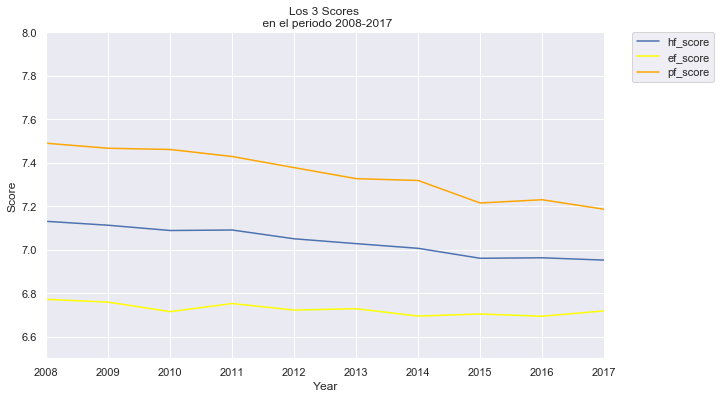

In [182]:
seaborn.set()
plt.figure(figsize=(10,6))
seaborn.lineplot(data=d_latin, x='year', y="hf_score", estimator="mean", ci=None, label="hf_score")
seaborn.lineplot(data=d_latin, x='year', y="ef_score", color="yellow",  ci=None, label="ef_score")
seaborn.lineplot(data=d_latin, x='year', y="pf_score", color="orange",  ci=None, label="pf_score")
plt.ylabel('Score')
plt.xlabel('Year')
plt.title('Los 3 Scores \n en el periodo 2008-2017')
plt.xlim(2008,2017)
plt.ylim(6.5,8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

**Conclusión:** la tendencia de ef_score (amarillo) es estable a los largo de los años. Por otro lado, hf_score (azul) tiene una tendencia a la disminucion en estos 10 años. Por lo que, pf_score (linea naranja) es el responsable de esta disminucion en hf_score.
Tener en cuenta que pf_identity es uno de los componentes que dan lugar al pf_score, quien junto a ef_score dan lugar a hf_score.

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


**pf_identity**

(-0.5, 10.5)

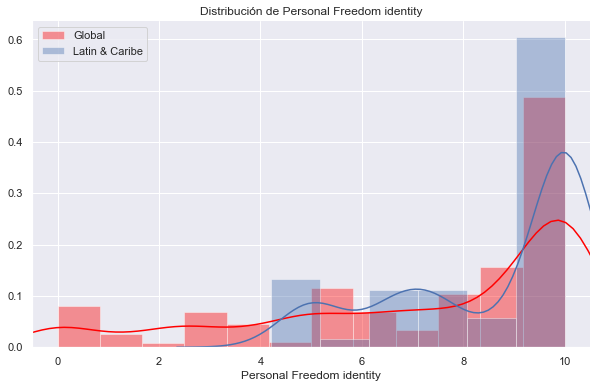

In [196]:
#pfi_data=dataset.pf_identity
plt.figure(figsize=(10,6))
plt.title('Distribución de Personal Freedom identity')
seaborn.distplot(dataset.pf_identity, label="Global", color="red", )
seaborn.distplot(d_latin.pf_identity, label="Latin & Caribe", )
plt.xlabel('Personal Freedom identity')
plt.legend()
seaborn.despine()
plt.xlim(-0.5,10.5)

**hf_score**

(0, 10)

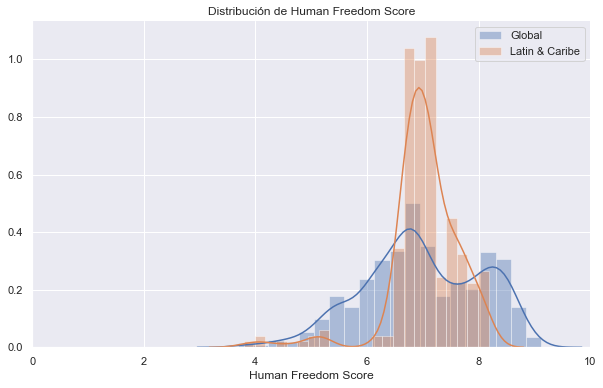

In [200]:
#pfi_data=dataset.pf_identity
plt.figure(figsize=(10,6))
plt.title('Distribución de Human Freedom Score')
seaborn.distplot(dataset.hf_score, label="Global")
seaborn.distplot(d_latin.hf_score, label="Latin & Caribe")
plt.xlabel('Human Freedom Score')
plt.legend()
seaborn.despine()
plt.xlim(0,10)

**Conclusión:** pf_identity tiene distribucion ???. La moda se encuentra en 10. Hay una gran dispersion, hasta valores de 4. 

hf_score tiene una distribucion parecida a la normal.

Depende de cual sea la pregunta a responder:
Por un lado, La region se compone de toda esa diversidad de paises, eliminar algunos sería enmascarar el fenomeno regional.
Por otro lado, por una cuestion matemática/estadistica conviene sacar los outliers para un mejor manejo de los datos.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.




## 1.¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
Pairplot permite buscar y observar relaciones entre las distintas variables.
¿es adecuado? Sí. Segun el manual de seaborn.pairplot hay todo un apartado para variables discretas asi que si esta contemplado. Por otro lado se puede ven relaciones con las otras dos variables.

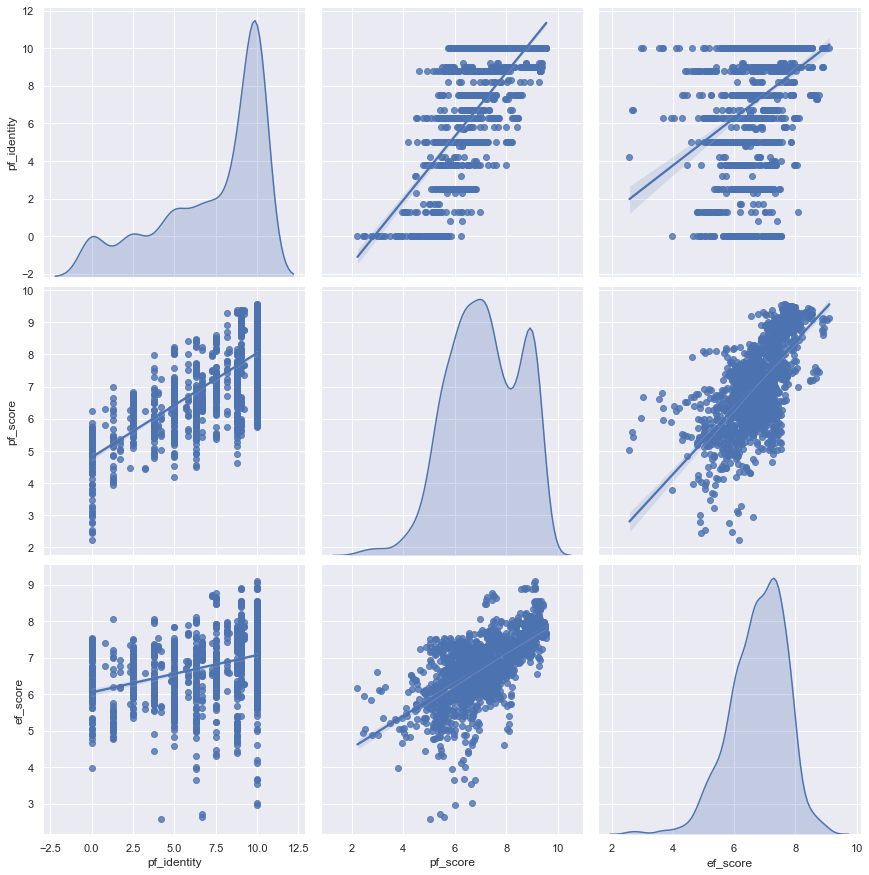

In [40]:
seaborn.pairplot(data=dataset, vars=['pf_identity', 'pf_score', 'ef_score'], height=4, diag_kind="kde",kind="reg")

**2.Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.**

**Conclusión:** Para ver correlacion es util usar el **regplot** ya que la variable pf_identity es dicreta, solo toma numeros enteros del 0 al 10. Graficamos la media y hacemos regresión lineal. Se observa una relacion proporcional positiva entre estas dos variables, en ambos casos, siendo mas marcada con pf_score. Esto tiene logica ya que pf_identity es uno de los valores utilizados para calcualar el pf_score.

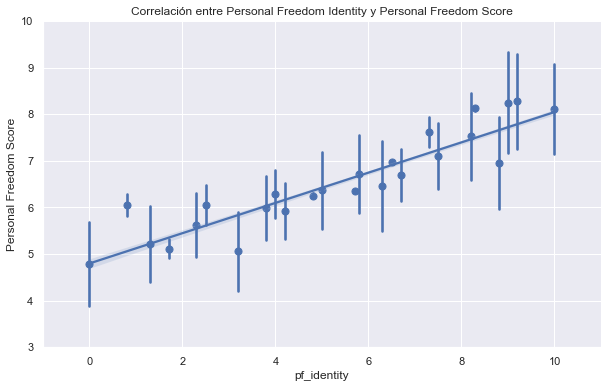

In [41]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, x='pf_identity', y='pf_score', x_jitter=False, x_estimator=numpy.mean, x_ci="sd",)
plt.ylabel('Personal Freedom Score')
plt.title('Correlación entre Personal Freedom Identity y Personal Freedom Score')
plt.ylim(3,10)
plt.xlim(-1,11)
seaborn.despine()

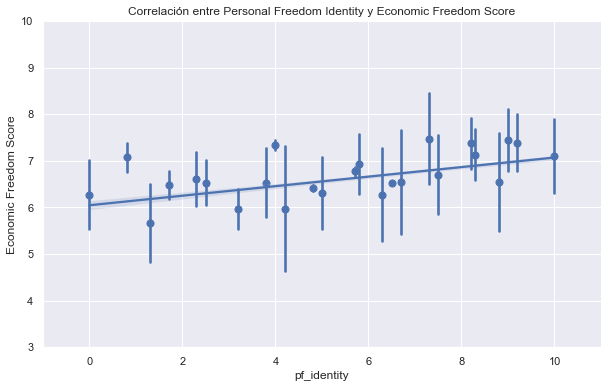

In [42]:
plt.figure(figsize=(10,6))
seaborn.regplot(data=dataset, x='pf_identity', y='ef_score', x_jitter=False, x_estimator=numpy.mean, x_ci="sd")
plt.ylabel('Economic Freedom Score')
plt.title('Correlación entre Personal Freedom Identity y Economic Freedom Score')
plt.ylim(3,10)
plt.xlim(-1,11)
seaborn.despine()

**3.Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores high, medium y low. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como pandas.cut o pandas.dcut. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.**

Criterio de los intervalos: 3 intervalos iguales.

In [201]:
#dataset.pf_identity.describe() #min 0 y max 10

In [203]:
pf_identity_segment=pandas.cut(dataset.pf_identity, 3, labels=["Low", "medium", "High"]) 
pf_score_segment=pandas.cut(dataset.pf_score, 3, labels=["Low", "medium", "High"]) 
ef_score_segment=pandas.cut(dataset.ef_score, 3, labels=["Low", "medium", "High"]) 
dataset['pf_identity_segment'] = pf_identity_segment
dataset['pf_score_segment'] = pf_score_segment
dataset['ef_score_segment'] = ef_score_segment
dataset[:2]
#3 intervalos iguales, 10/3

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank,pf_identity_segment,pf_score_segment,ef_score_segment
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0,medium,High,High
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0,Low,medium,medium


## Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.

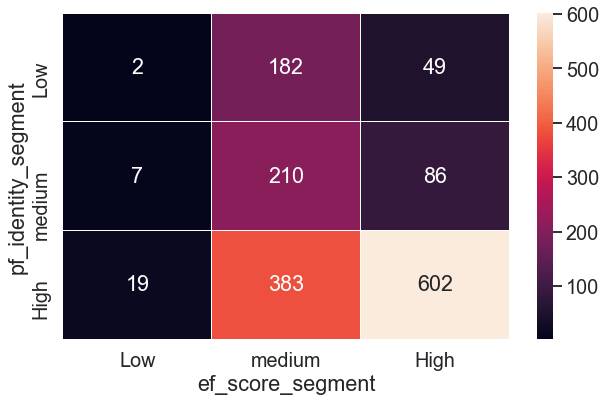

In [45]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,6))
heat_pfi_efs = pandas.crosstab(dataset.pf_identity_segment, dataset.ef_score_segment)
seaborn.heatmap(heat_pfi_efs, annot=True, fmt="d", linewidths=.1)

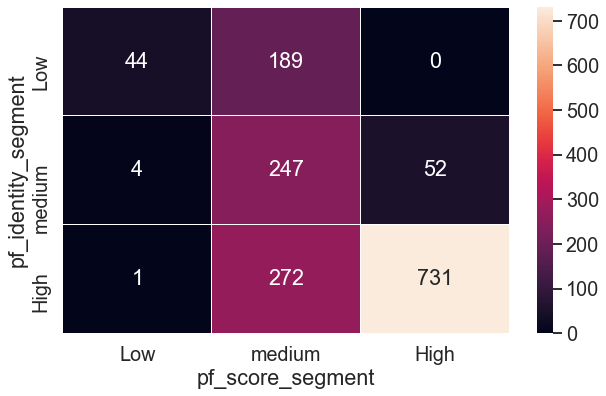

In [46]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,6))
heat_pfi_pfs = pandas.crosstab(dataset.pf_identity_segment, dataset.pf_score_segment)
seaborn.heatmap(heat_pfi_pfs, annot=True, fmt="d", linewidths=.1)

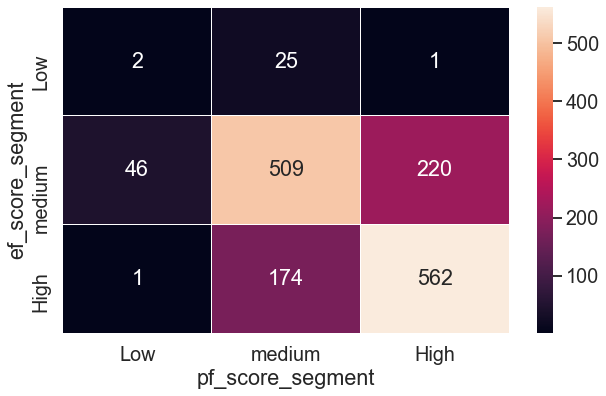

In [47]:
seaborn.set_context(context='talk', font_scale=1.2)
plt.figure(figsize=(10,6))
heat_efs_pfs = pandas.crosstab(dataset.ef_score_segment, dataset.pf_score_segment)
seaborn.heatmap(heat_efs_pfs, annot=True, fmt="d", linewidths=.1)

# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. 

Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.


**MT por Slack: vamos a hacer un anuncio general: El punto 4.4 de la parte 1 en el práctico es un horror! Felicitaciones a los grupos que se dieron cuenta de que lo que está escrito no tiene ningún sentido, no sé cómo se me pasó. Veamos, region NO ES ORDINAL, y no hay forma de hacerlo ordinal. El test Tau-Kendall es para variables ordinales o rankings, así que no se aplica a region. Hay dos opciones, o hacen un test para correlación de categóricas, o usan otro par de variable que se pueda hacer ordinal usando pandas.cut y aplican Kendall. Lo que les parezca más interesante de resolver. (edited)**

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?